Reference:

https://github.com/hellomlorg/Anomaly-Detection-using-Autoencoders

In [ ]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv('/content/data.csv', sep = ',',usecols = ['Value'])
df = df.dropna()
data=df.to_numpy()

In [ ]:
print(df)

In [ ]:
#calculate mean square error
mse = np.mean(np.square(data))
print(mse)

In [ ]:
#plot the data and mse on same plot with different colors.
plt.plot(data, 'r')
plt.show()
plt.plot(mse, 'b')
plt.show()

### START HERE

[[ 27.10988845]
 [ 40.77644211]
 [122.5414689 ]
 ...
 [930.0137499 ]
 [915.8049415 ]
 [845.9811    ]]
dataset [[ 27.109888]
 [ 40.776443]
 [122.541466]
 ...
 [930.01373 ]
 [915.80493 ]
 [845.9811  ]]
Model: "model_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_28 (InputLayer)       [(None, 1)]               0         
                                                                 
 dense_162 (Dense)           (None, 14)                28        
                                                                 
 dropout_54 (Dropout)        (None, 14)                0         
                                                                 
 dense_163 (Dense)           (None, 7)                 105       
                                                                 
 dense_164 (Dense)           (None, 4)                 32        
                                                        

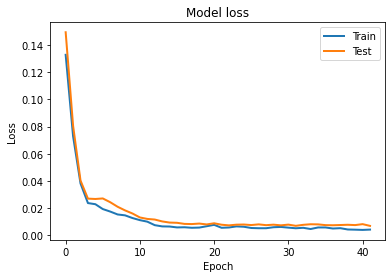

mse [0.01579334 0.01620443 0.01529499 0.01611965 0.01587933 0.01511674
 0.0151349  0.015864   0.01478526 0.01404529 0.01375368 0.01401949
 0.01382751 0.01349728 0.01295361 0.01198846 0.01214946 0.01223773
 0.0107714  0.01130932 0.01025213 0.0102196  0.00947434 0.00968331
 0.00888784 0.0087426  0.00804379 0.00757377 0.00713372 0.00684561
 0.00664762 0.00662679 0.00612637 0.00559688 0.00542648 0.0049498
 0.00472742 0.00456234 0.00462117 0.00407671 0.00383808 0.00340935
 0.00352858 0.00334505 0.0029555  0.00291701 0.00272152 0.00264836
 0.00249427 0.00246071 0.00231927 0.00222204 0.00215059 0.00200605
 0.00196328 0.00197493 0.00189039 0.00184882 0.00177647 0.00180315
 0.00173009 0.00171832 0.00168992 0.00168349 0.00165813 0.00165845
 0.00165047 0.00164218 0.00164213 0.00164182 0.00165107 0.00164642
 0.00165096 0.00165663 0.00166975 0.00166508 0.0016858  0.00170173
 0.00170664 0.00157295 0.00145141 0.00151344 0.00136143 0.00114446
 0.00107951 0.00099675 0.00090868 0.00109151 0.00076756 0.0

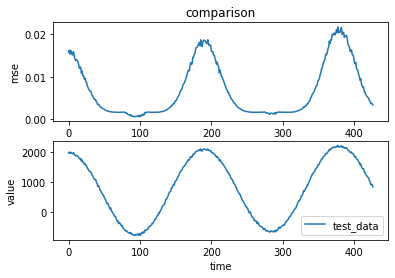

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
RANDOM_SEED = 2021
TEST_PCT = 0.3
if __name__ == '__main__':

    LABELS = ["Normal","Fraud"]
    dataframe = pd.read_csv('/content/data.csv',usecols=[1], engine='python')
    dataset = dataframe.values
    print(dataset)
    # dataframe=dataframe.diff(axis = 0, periods = 1)
    # dataset = dataframe.dropna().values
    dataset = dataset.astype('float32')
    # normalize the dataset
    print('dataset', dataset)

    sc = StandardScaler()
    result = sc.fit_transform(dataset.reshape(-1, 1))
    train_size = int(len(dataset) * 0.7)
    test_size = len(dataset) - train_size
    train_data1, test_data1 = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
    train_data, test_data = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
    min_val = tf.reduce_min(train_data)
    max_val = tf.reduce_max(train_data)
    train_data = (train_data - min_val) / (max_val - min_val)
    test_data = (test_data - min_val) / (max_val - min_val)
    train_data = tf.cast(train_data, tf.float32)
    test_data = tf.cast(test_data, tf.float32)
    nb_epoch = 50
    batch_size = 64
    input_dim = train_data.shape[1]  # num of columns, 30
    encoding_dim = 14
    hidden_dim_1 = int(encoding_dim / 2)  #
    hidden_dim_2 = 4
    learning_rate = 1e-7
    input_layer = tf.keras.layers.Input(shape=(input_dim,))
    encoder = tf.keras.layers.Dense(encoding_dim, activation="tanh",
                                    activity_regularizer=tf.keras.regularizers.l2(learning_rate))(input_layer)
    encoder = tf.keras.layers.Dropout(0.2)(encoder)
    encoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
    encoder = tf.keras.layers.Dense(hidden_dim_2, activation=tf.nn.leaky_relu)(encoder)
    # Decoder
    decoder = tf.keras.layers.Dense(hidden_dim_1, activation='relu')(encoder)
    decoder = tf.keras.layers.Dropout(0.2)(decoder)
    decoder = tf.keras.layers.Dense(encoding_dim, activation='relu')(decoder)
    decoder = tf.keras.layers.Dense(input_dim, activation='tanh')(decoder)
    autoencoder = tf.keras.Model(inputs=input_layer, outputs=decoder)
    autoencoder.summary()
    cp = tf.keras.callbacks.ModelCheckpoint(filepath="autoencoder_fraud.h5",
                                            mode='min', monitor='val_loss', verbose=2, save_best_only=True)
    # define our early stopping
    early_stop = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.0001,
        patience=10,
        verbose=1,
        mode='min',
        restore_best_weights=True)
    autoencoder.compile(metrics=['accuracy'],
                        loss='mean_squared_error',
                        optimizer='adam')
    history = autoencoder.fit(train_data, train_data,
                              epochs=nb_epoch,
                              batch_size=batch_size,
                              shuffle=True,
                              validation_data=(test_data, test_data),
                              verbose=1,
                              callbacks=[cp, early_stop]
                              ).history
    plt.plot(history['loss'], linewidth=2, label='Train')
    plt.plot(history['val_loss'], linewidth=2, label='Test')
    plt.legend(loc='upper right')
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    # plt.ylim(ymin=0.70,ymax=1)
    plt.show()
    test_x_predictions = autoencoder.predict(test_data)
    mse = np.mean(np.power(test_data - test_x_predictions, 2), axis=1)
    print('mse',mse)
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
    # plt.plot(ts, label="passengers")
    ax1.set_title('comparison')
    ax1.set_xlabel('time')
    ax1.set_ylabel('mse')
    ax1.plot(mse, label="dataset")

    ax2.set_xlabel('time')
    ax2.set_ylabel('value')
    ax2.plot(test_data1, label="test_data")
    # plt.plot(anomalies_array, label="difference")
    # plt.plot(newdata['ewa'], label="ewa")
    plt.legend(loc='best')
    plt.show()

In [ ]:
plt.plot((test_data),'r')
plt.show()


In [ ]:
cutoff = (2*np.std(mse)+np.mean(mse))
cutoff_1 = (-2*np.std(mse)+np.mean(mse))                    # decide on a cutoff limit
prediction = np.zeros_like(mse)    # initialise a matrix full with zeros
prediction[mse > cutoff] = 1
prediction[mse < cutoff_1] = 1       
#print(prediction)
cutoff2 = ((2*np.std(test_data))+np.mean(test_data))
cutoff3 = ((-2*np.std(test_data))+np.mean(test_data))
test = np.zeros_like(test_data)
test[test_data > cutoff2] = 1
test[test_data < cutoff3] = 1
#print(test)


In [ ]:
confusion_matrix(test,prediction)

In [ ]:
precision_score(test,prediction)

In [ ]:
recall_score(test,prediction)